# Assignment 3(A) Implementing the Artificial Neural Networks Learning Algorithm to Predict Automobile Loan Evaluation

<a id='section_1'></a>
## 1. Introduction

In this assignment, you will implement the artificial neural network algorithm by using both `NumPy` and `PyTorch` libraries and apply it to predicting automobile loan evaluation. Before you begin this assignment, you need to install all required libraries. This assignment utilizes the [scikit-learn](https://scikit-learn.org/stable/) library for data preprocessing. Please refer to the [PyTorch tutorial (covered in Lecture 4)](https://moodle.hku.hk/mod/resource/view.php?id=2974879) regarding installation and usage of the PyTorch library. Click the following links to navigate to different sections.

**Contents**

* [1. Introduction](#section_1)
* [2. Auto Loan Dataset](#section_2)
    * [2.1. Data Description](#section_21)
    * [2.2. Data Loading](#section_22)
    * [2.3. Data visualization](#section_23)
    * [2.4. Data Processing](#section_24)
* [3. Concepts and Definitions](#section_3)
* [4. Neural Networks Algorithms with NumPy](#section_4)
    * [4.1. Activation Function](#section_41)
    * [4.2. Prameter Initialization](#section_42)
    * [4.3. Feed Forward](#section_43)
    * [4.4. Backpropagation](#section_44)
    * [4.5. Parameter Update](#section_45)
    * [4.6. Training Step](#section_46)
    * [4.7. Prediction Function](#section_47)
    * [4.8. Train Neural Network](#section_48)
* [5. Neural Networks Algorithms with Pytorch](#section_5)
    * [5.1. Dataset Structure Generation](#section_51)
    * [5.2. Define Neural Network Module](#section_52)
    * [5.3. Define Loss Function and Optimizer](#section_53)
    * [5.4. Train Neural Network](#section_54)
    * [5.5. Export Network Structures and Visualization](#section_55)
* [6. Sample Visualization](#section_6) 
* [7. Marking Scheme and Submission](#section_7) 
* [8. Summary](#section_8)

In [2]:
# When running task 12 and the cells after it, the kernel keeps shutting down
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# Scientific and vector computation for python
import numpy as np
# Data analysis and manipulation tool for python
import pandas as pd
# Plotting library
import matplotlib.pyplot as plt 

# Machine learning basic tools 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pytorch library
import torch
# import wrappers for dataset and dataloader
from torch.utils.data import TensorDataset, DataLoader
# check if GPU is available, otherwise we use CPU as computation backend
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# set default data type, we use float64 here
torch.set_default_dtype(torch.float64)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<a id='section_2'></a>
## 2. Auto Loan Dataset

<a id='section_21'></a>
### 2.1 Data Description

| Feature | Description 
|:----:|:- 
| ModifiedCreditScore | The greater of the Credit score and Co-Credit Score.
| ModifiedBankruptcyScore | The greater of the Bankruptcy score and Co-Bankruptcy Score.
| EmployedMonths | The stated number of months that the applicant has been employed with their current employer.
| TotalMonthlyIncome | The sum of the applicants and the co-applicants monthly income.
| PrimeMonthlyLiability | The stated non-rent liabilities of applicant.
| PrimeMonthlyRent | The applicant's stated monthly housing expense.
| TotalMonthlyDebtBeforeLoan | Sum of applicant and co-applicants housing payments and liabilities.
| VehicleYear | The year of the vehicle the applicant is looking to purchase.
| VehicleMileage | The number of miles on the vehicle the applicant is looking to purchase.
| TotalVehicleValue | The amount the vehicle is being sold for.
| AmountRequested | The amount the applicant is requesting to borrow.
| DownPayment | The amount of money the applicant is paying upfront toward the vehicle loan.
| Loanterm | The number of months applicant has to pay loan off.
| OccupancyDuration | The stated number of months the applicant has been in their current residence at the time of the application.
| EstimatedMonthlyPayment | The estimated monthly payment based on loan amount, interest rate, and loan term.
| NumberOfOpenRevolvingAccounts | The count of revolving accounts that appear on the applicant's credit report.
| LTV | The vehicle's loan to value ratio.
| DTI | Applicant's debt to income ratio based on credit report and loan type. 
| Source | Identifies channel from which application was received.
| EmploymentStatus | Indicates if the applicant was employed at the time application was submitted.
| VehicleMake | The make of the vehicle the applicant is looking to purchase.
| isNewVehicle | Indicates if the vehicle the applicant is looking to purchase is new or used.
| OccupancyStatus | The stated occupancy status of the applicant at the time of the application.
| RequestType | The type of vehicle loan requested by the applicant (Refinance, lease buyout, etc.)
| MemberIndicator | Indicates if applicant was a bank member before applying for loan
| CoApplicantIndicator | Indicates whether or not a co-applicant is present on the application
| LoanStatus | Identifies whether loan was approved or denied

<a id='section_22'></a>
### 2.2. Data Loading

In this section, the dataset for the classification task is loaded. Then, you can use the built-in function `.info()` to generate the summary of the dataset. Also, you can use `.head()` function to check several data items at the head of dataset.  

In [4]:
# Load Data
raw_classification_data = pd.read_csv("raw_classification_data.csv")
raw_classification_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7180 entries, 0 to 7179
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LoanStatus                     7180 non-null   object 
 1   Source                         7180 non-null   object 
 2   ModifiedCreditScore            7180 non-null   int64  
 3   ModifiedBankruptcyScore        7180 non-null   int64  
 4   EmploymentStatus               7180 non-null   object 
 5   EmployedMonths                 7180 non-null   int64  
 6   TotalMonthlyIncome             7180 non-null   float64
 7   PrimeMonthlyLiability          7180 non-null   float64
 8   PrimeMonthlyRent               7180 non-null   float64
 9   TotalMonthlyDebtBeforeLoan     7180 non-null   float64
 10  VehicleYear                    7180 non-null   int64  
 11  VehicleMake                    7180 non-null   object 
 12  VehicleMileage                 7180 non-null   f

<a id='section_23'></a>
### 2.3. Data Visualization

To illustrate the dataset more intuitively, we have visualized the dataset according to the distribution of each feature. All numeric (continuous) data are visualized by blue histograms, while red bar plots show the categorical data. 

Attribute Number: 27


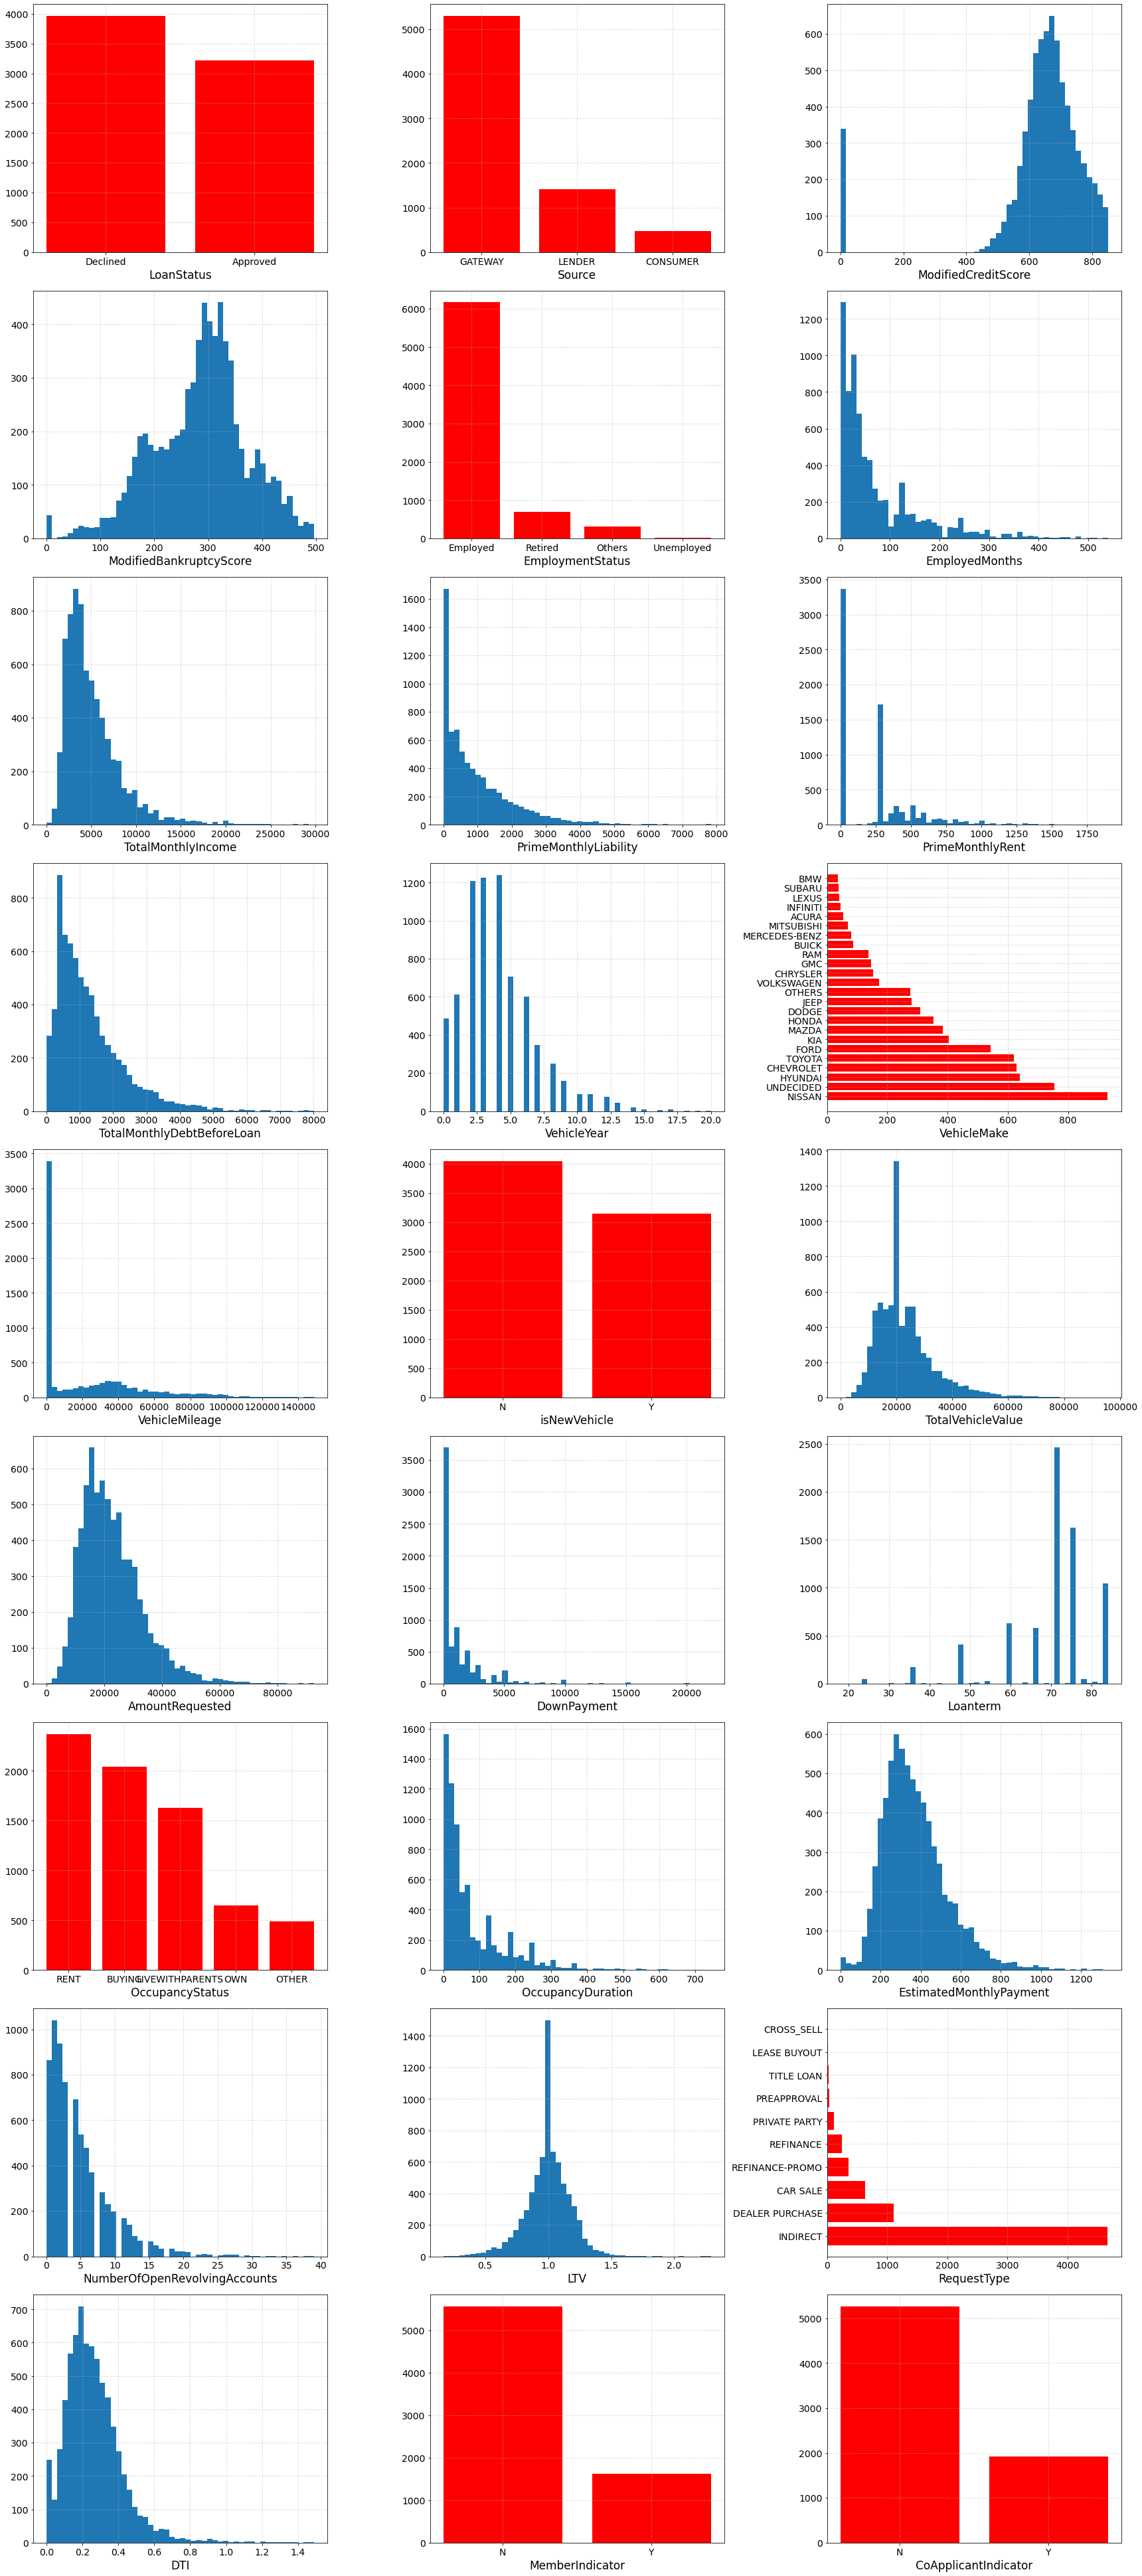

In [5]:
attribute_number = len(raw_classification_data.columns)
print("Attribute Number: {}".format(attribute_number))

# subplots 
fig = plt.figure(figsize=(24, 54))
ax = fig.subplots(attribute_number//3,3)
# iterations
for num, title in enumerate(raw_classification_data.columns):
    idx = num//3 # divided with no remainder
    idy = num%3  # remainder 
    if raw_classification_data[title].dtype in ['object']:
        value_count_dict = raw_classification_data[title].value_counts().to_dict()
        keys = list(value_count_dict.keys())
        values = list(value_count_dict.values())
        if len(raw_classification_data[title].unique().tolist()) < 8:
            ax[idx, idy].bar(keys, values, color='r')
        else:
            ax[idx, idy].barh(keys, values, color='r')
    else:
        ax[idx, idy].hist(raw_classification_data[title].values, bins=50);
    
    # set title with attribute
    ax[idx, idy].set_xlabel(title, fontsize=17)
    # set grid width
    ax[idx, idy].grid(linestyle='--', alpha=0.5)
    # font size of ticks
    ax[idx, idy].tick_params(labelsize=14)
plt.tight_layout()

<a id='section_24'></a>
### 2.4. Data Processing 

1. one-hot encoding (not include labels 'LoanStatus') with `pd.get_dummies()`
2. separate the whole dataset with features and classification labels.
3. separate training ($70\%$) and testing dataset ($30\%$) by `train_test_split()` using the [scikit-learn library](https://scikit-learn.org/). 
4. feature scaling with `StandardScaler()`.

In [6]:
# one-hot encoding
# 1.1 separate features and label (no need to encode label data)
loan_state = raw_classification_data['LoanStatus']
classification_data = raw_classification_data.drop('LoanStatus', axis=1, inplace=False)
# 1.2 encoding 
classification_data = pd.get_dummies(classification_data)
# 1.3 give back the label 
classification_data['LoanStatus'] = loan_state
classification_data.LoanStatus.replace({'Declined': 0,'Approved': 1}, inplace=True)

# 2. features and label extraction 
class_name = 'LoanStatus'
feature_name = list(classification_data.columns)
feature_name.remove(class_name)
data_x = classification_data[feature_name]
data_y = classification_data[class_name]

# 3. training and testing data split
# Note that the random state should be not changed (25) for comparison between different algorithms in Assignment 02
feature_train, feature_test, label_train, label_test = train_test_split(data_x, data_y, test_size = 0.30, random_state = 25)

# 4. feature scaling with sckit-learn library 
# 4.1. feature scaler class 
scaler = StandardScaler()
# 4.2. training and testing data
x_train = scaler.fit_transform(feature_train)
x_test = scaler.transform(feature_test)
y_train = np.atleast_2d(label_train.values).T
y_test = np.atleast_2d(label_test.values).T

<a id='section_3'></a>
## 3. Concepts and Definitions

In this assignment, the artificial neural networks (ANNs) consists of an input layer, a hidden layer, and an output layer (note: the total number of layers is 2 ($L=2$) that do not include the input layer). Each instance of inputs is a 70-dimensional vector. The training data has been loaded into the variables `x_train` and `y_train` as mentioned above. The architecture of the ANNs is shown as follows (refer to the [course handout for details on notation](https://moodle.hku.hk/mod/resource/view.php?id=2965531)):

<img src=./Assignment_NN.jpg width=70% />

Two sets of network parameters ($\Theta^{(1)}, \Theta^{(2)}$) are initialized randomly. The dimension of $\Theta^{(1)}$ is 100 $\times$ 71. The dimension of $\Theta^{(2)}$ is 2 $\times$ 101. The 2 units in the output layer represent the loan status of "approval" and "decline" respectively (thus $K=2$). The goal of ANNs is to produce a model that minimizes the cost function (cross-entropy loss) as shown below:

$$
    J(\Theta) =-\frac{1}{m}\Big[\sum_{i=1}^{m}\sum_{k=1}^{K}(y_{k}^{(i)}\log(h_\Theta(x^{(i)}))_k+(1-y_{k}^{(i)})\log(1-h_\Theta(x^{(i)}))_k \Big] +\frac{\lambda}{2m}\sum_{l=1}^{L}\sum_{i=1}^{s_{l-1}}\sum_{j=1}^{s_{l}}\big(\Theta_{ji}^{(l)} \big)^2 \\
    \text{where } \hspace{1cm}h_\Theta(x) \in \mathbb{R}^K \ \text{(i.e., h of x is a K-dimensional real-valued vector)}, \\
    \hspace{-.5cm} (h_\Theta(x))_k = k^{th} \mbox{ scalar value in the vector.} \\
$$


## 4. Implementing the Artificial Neural Networks Algorithm using NumPy <a id='section_4'></a>

<a id='section_41'></a>
### 4.1. The Sigmoid Activation Function

Your first step is to implement the function `sigmoid()` and its derivative function `sigmoid_prime()` so that they can be used by the rest of your program. The formulation of the Sigmoid function is:

$$
g(z) = \frac{1}{1+e^{-z}}
$$


For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices.

The derivative of Sigmoid function `sigmoid_prime()` is :

$$
g'(z) = g(z)(1-g(z))
$$


<a id='task_1'></a>

**Task 1:** In this task, you will

1. implement the `sigmoid()` function. (1 line)
2. implement the derivative of the Sigmoid function in `sigmoid_prime()` (1 line)

In [7]:
# Sigmoid function
def sigmoid(z):
    # Task 1(A):
    # ====================== START YOUR CODE HERE ======================
    return 1 / (1+np.exp(-z))
    # ======================= END YOUR CODE HERE =======================

# derivative of sigmoid function
def sigmoid_prime(z):
    # Task 1(B):
    # ====================== START YOUR CODE HERE ======================
    return sigmoid(z) * (1-sigmoid(z))
    # ======================= END YOUR CODE HERE =======================

**[Test Block 1]:** Test code for function `sigmoid()` and `sigmoid_prime()`. You can execute the code block, then it will print out whether you answer is correct or not. 

In [8]:
# Sigmoid related functions
demo_data = np.array([[-2.0, -1.0, 0.0, 1.0, 2.0]])
# Sigmoid value
s = sigmoid(demo_data)
# Derivative of sigmoid value
s_prime = sigmoid_prime(demo_data)
print("Sigmoid value: {}".format(s))
print("Sigmoid derivitive value: {}".format(s_prime))

if np.allclose(s, [[0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708]]) and \
    np.allclose(s_prime, [[0.10499359, 0.19661193, 0.25, 0.19661193, 0.10499359]]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Sigmoid value: [[0.11920292 0.26894142 0.5        0.73105858 0.88079708]]
Sigmoid derivitive value: [[0.10499359 0.19661193 0.25       0.19661193 0.10499359]]
Your answers are correct!


<a id='section_42'></a>
### 4.2. Parameter Initialization

Before using the neural network, the parameters in different layers should be initialized, which is of great importance during network training. Here, we would like to use the method as the following equation from [He Initialization](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf):

$$
\Theta^{(k)} \sim \mathcal{N}(0, \frac{2}{s_k}) \ ,
$$
where $\Theta^{(k)}$ denotes the parameters in layer $k$, $s_k$ represents the number of inputs of this layer. 

<a id='task_2'></a>

**Task 2:** In this task, you will

1. initialize the layer parameters with `numpy.random.normal()` function. Note that the mean value and variance value are defined by the above function. Here, three input variables should be considered, namely, `loc`, `scale`, and `size`. The `loc` and `scale` should follow the distribution of $\Theta^{(k)}$ and the `size` should be (output layer size, input layer size + 1). Note that the `+1` represents the bias elements. (1 line)

In [9]:
def parameter_initialization(layer_size_list):
    param_dict = dict()
    for idx in range(len(layer_size_list)-1):
        input_layer_size, output_layer_size = layer_size_list[idx], layer_size_list[idx+1]
        # Task 2:
        # ====================== START YOUR CODE HERE ======================
        # 1. init layer parameters with He Initialization (1 line)
        param_dict['Theta{}'.format(idx+1)] = np.random.normal(loc=0, scale=np.sqrt(2.0/(input_layer_size)), size=(output_layer_size, input_layer_size+1))
        # ======================= END YOUR CODE HERE =======================
    return param_dict

**[Test Block 2]:** Test code for function `parameter_initialization()`.

In [10]:
layer_size_list = [256, 512, 64]
demo_param_dict = parameter_initialization(layer_size_list)

isCorrect = True
for idx, theta in enumerate(demo_param_dict.values()):
    mean_value = np.mean(theta[:])
    std_value = np.std(theta[:])
    # if the desired value is similar to the result from your implemented function. 
    # Your answer is to some extent correct and you still need to check it twice.
    print(f'Layer{idx}, mean: {mean_value}, std: {std_value}')
    print(f'Desired, mean: {0.0}, std: {np.sqrt(2/theta.shape[0])}')
    if np.allclose(mean_value, 0.0, atol=0.01): # the absolute error tolerence is 0.01
        continue
    else:
        isCorrect = False
        break
        
if isCorrect:
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Layer0, mean: 0.00020091278386854319, std: 0.08819523216739374
Desired, mean: 0.0, std: 0.0625
Layer1, mean: -0.00037320570694234905, std: 0.06252329221710817
Desired, mean: 0.0, std: 0.1767766952966369
Your answers are correct!


### 4.3. Forward Propagation<a id='section_43'></a>

You will implement the forward propagation of the ANNs algorithm in the following. 

**Task 3:** <a id='task_3'></a> In this task, you will

1. add a bias term to `previous_a` with `np.concatenate()`. These items should be initialized by $1$ with `np.ones()`. You should concatenate them in this order: (bias, weights) using the setting `axis=0`. (1 line)
2. use `np.matmul()` to multiply the layer parameters `theta` and `previous_a` as the first and the second inputs, respectively. (1 line)
3. apply activation function `sigmoid()`. (1 line)

You will implement the variables, $a^{(k)}$, $a^{(k-1)}$, $z^{(k)}$, and $z^{(k-1)}$ according to the following definition:

$$z^{(k)} = \Theta^{(k)}a^{(k-1)} \ ,$$
$$a^{(k)} = g(z^{(k)}) \ ,$$
where $g(\cdot)$ denotes the [sigmoid function](#section_41). $\Theta^{(k)}$ is the parameter matrix between Layer $(k-1)$ and Layer $k$.

In [11]:
def feed_forward(x_train, param_dict):
    
    ########### In each iteration ###########
    # 1. add bias term to the data
    # 2. matrix multiplication with layer parameters
    # 3. apply activation function (sigmoid)
    #########################################
    
    # feedforward propagation
    # transpose the input data, so that each column of the matrix is a data item
    input_data = np.array(x_train).copy().T
    value_dict = {'a0': input_data}
    for k in range(1, len(param_dict)+1):
        theta = param_dict['Theta{}'.format(k)] # Theta matrix in (k)-th layer
        input_a = value_dict['a{}'.format(k-1)] # a in (k-1)-th layer
        
        # task 3: 
        # ====================== START YOUR CODE HERE ======================
        # 1. add bias ones vector 
        input_a_with_bias = np.concatenate([np.ones((1, input_a.shape[1])), input_a], axis= 0)

        # 2. compute output_z using matrix multiplication of theta and input_a
        output_z = np.matmul(theta, input_a_with_bias)

        # 3. compute output_a using sigmoid(z) from Task 1
        output_a = sigmoid (output_z)
        # ====================== END YOUR CODE HERE ========================
        
        # save values
        value_dict['z{}'.format(k)] = output_z
        value_dict['a{}'.format(k)] = output_a

    return value_dict

**[Test Block 3]:** Test code for function `feed_forward()`. You can execute the code block, then it will print out whether you answer is correct or not. 

In [12]:
# layer parameter generation 
demo_param_dict['Theta1'] = np.array([[1,2], [3,4], [5,6]]).T
demo_param_dict['Theta2'] = np.array([[0.5, 0.2, 0.1]])

# similar to the training dataset, each row represents a data item
demo_input = np.array([[0.2, 0.3]])

output_value_dict = feed_forward(demo_input, demo_param_dict)
print(output_value_dict)

if np.allclose(output_value_dict['a2'], [0.68791364]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

{'a0': array([[0.2],
       [0.3]]), 'z1': array([[3.1],
       [4.6]]), 'a1': array([[0.95689275],
       [0.9900482 ]]), 'z2': array([[0.79038337]]), 'a2': array([[0.68791364]])}
Your answers are correct!


### 4.4. Backpropagation <a id='section_44'></a>
In the backpropagation process, you need to compute errors $\delta^{(k)}$ at the output layer and then propagate the errors to each hidden layer as follows (note: $L$ = total number of layers; dimension of $\delta^{(k)}=s_k \times m$; "$\circ$" refers to elementwise multiplication):

$$
    \delta^{(k)} = \left\{ 
    \begin{aligned} 
        & a^{(k)} - y \ ,  &\text{if }k=L \hspace{3.2cm} \\ 
        & (\Theta^{(k)})^{\top}\delta^{(k+1)} \circ g^{\prime}(z^{(k)}) \ , &\text{if }k=L-1, L-2, \cdots, 2. \\ 
    \end{aligned}
    \right .
$$

Then, the gradient values for parameters are computed as follows:
$$
   \Delta^{(k)} = \left\{ 
    \begin{aligned} 
        &  \delta^{(k)} \mathbf{1}_{m\times1} \ , \hspace{3.5cm} \text{for bias nodes} \ , \\
        &  \delta^{(k)}{a^{(k-1)}}^{\top} \ , \hspace{2.5cm} \text{for non-bias nodes.} \\ 
    \end{aligned}
    \right .
$$

**Task 4:** <a id='task_4'></a>In this task, you will

1. compute errors (delta) of each layer. Please implement different error formulations for ouput layer ($k=2$) and the hidden layer ($k=1$), respectively. The results should be saved "in the dictionary `delta_dict` with "delta{k}" as that in `param_dict`. (3 lines)
2. compute gradients of each layer. Please implement different gradient formulation for the bias and weights. The results should be saved in variable `grads`. (2 lines)

In [13]:
def back_propagation(value_dict, param_dict, y_train):
    grad_dict = dict()
    delta_dict = dict()
    for k in reversed(range(1, len(param_dict)+1)):
        theta = param_dict['Theta{}'.format(k)] # ??? .format() ???
        # Back Propagation
        # task 4: 
        # ====================== START YOUR CODE HERE ======================
        # 1. compute errors (delta) of the layer (3 lines)
        if k == len(param_dict):
            # compute errors of the output layer
            delta_dict['delta{}'.format(k)] = value_dict['a{}'.format(k)] - y_train.T
        else:
            # compute errors of the hidden layer
            # only the weights (except bias) are considered during computation
            weights = param_dict['Theta{}'.format(k+1)][:, 1:]
            delta_dict['delta{}'.format(k)] = np.matmul(weights.T, delta_dict['delta{}'.format(k+1)]) * sigmoid_prime(value_dict['z{}'.format(k)])
        # ====================== END YOUR CODE HERE ========================
        delta = delta_dict['delta{}'.format(k)]

        grads = np.zeros_like(theta)
        # task 4: 
        # ====================== START YOUR CODE HERE ======================
        # 2. compute gradients of the layer (2 lines)
        # compute the gradients of bias
        grads[:, :1] = delta.sum(axis=1, keepdims=True)
        # compute the gradients of weights
        grads[:, 1:] =  np.matmul(delta, value_dict['a{}'.format(k-1)].T)
        # ====================== END YOUR CODE HERE ========================
        grad_dict['Theta{}'.format(k)] = grads
    return grad_dict

**[Test Block 4]:** Test code for function `back_propagation()`. You can execute the code block, then it will print out whether you answer is correct or not. 

In [14]:
# layer parameter generation 
demo_param_dict = dict()
demo_param_dict['Theta1'] = np.array([[0.1, 0.1], [0.3, 0.4], [0.5, 0.6]]).T
demo_param_dict['Theta2'] = np.array([[0.5, 0.2, 0.1]])

demo_input = np.array([[0.2, 0.8]])
demo_label = np.array([[1]])

# feed forward 
demo_value_dict = feed_forward(demo_input, demo_param_dict)
# backpropagation
gradient_dict = back_propagation(demo_value_dict, demo_param_dict, demo_label)
print('Theta 1: {}'.format(gradient_dict['Theta1']))
print('Theta 2: {}'.format(gradient_dict['Theta2']))

if np.allclose(gradient_dict['Theta1'], [[-0.01542467, -0.00308493, -0.01233973], [-0.00748752, -0.0014975, -0.00599002]]) and \
    np.allclose(gradient_dict['Theta2'], [[-0.33331792, -0.21214104, -0.2197433 ]]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Theta 1: [[-0.01542467 -0.00308493 -0.01233973]
 [-0.00748752 -0.0014975  -0.00599002]]
Theta 2: [[-0.33331792 -0.21214104 -0.2197433 ]]
Your answers are correct!


### 4.5. Parameter Update <a id='section_45'></a>
Given the gradient values, the parameters are updated with regularization using the gradient descent algorithm as follows:

$$
    \Theta^{(k)} := \Theta^{(k)} - \eta D^{(k)}  \hspace{3.5cm} \text{where } k = 1, \cdots, L\\
     \text{where }D^{(k)} := \begin{cases} \frac{1}{m}\Delta^{(k)}\hspace{3.5cm} \text{for bias nodes} \ , \\
\frac{1}{m}\Big(\Delta^{(k)}+\lambda\Theta^{(k)}\Big) \hspace{1.5cm} \text{for non-bias nodes.}  \end{cases} 
$$

<!-- \frac{\partial J(\Theta)}{\partial\Theta^{(k)}} -->
In detail, the update rule of weights and bias are different as follows:
$$
    \Theta^{(k)} := \Theta^{(k)} - \frac{\eta}{m} \Delta^{(k)} \hspace{3.1cm} \text{for bias nodes} \ . \\
    \Theta^{(k)} := \Theta^{(k)} - \frac{\eta}{m} (\Delta^{(k)} + \lambda \Theta^{(k)}) \ , \hspace{1.8cm} \text{for non-bias nodes.}
$$

**Task 5:** <a id='task_5'></a> In this task, you will

1. optimize layer parameters. Please implement different gradient formulation for the bias `new_theta[:1, :]` and weights `new_theta[1:, :]`. The results should be saved in variable `new_theta`. (2 lines)

In [15]:
def optimization_step(grad_dict, param_dict, eta, lamda, num_data):
    new_param_dict = dict()
    for k in range(1, len(param_dict)+1):
        old_theta = param_dict['Theta{}'.format(k)]
        grads = grad_dict['Theta{}'.format(k)]
        new_theta = np.zeros_like(old_theta)
        # task 5: 
        # ====================== START YOUR CODE HERE ======================
        # optimize layer parameters
        # update bias
        new_theta[:, :1] =  old_theta[:, :1] - eta * grads[:, :1]/num_data
        # update weights
        new_theta[:, 1:] =  old_theta[:, 1:] - eta * (grads[:, 1:] + lamda * old_theta[:, 1:]) / num_data
        # ====================== END YOUR CODE HERE ========================
        new_param_dict['Theta{}'.format(k)] = new_theta
    return new_param_dict

**[Test Block 5]:** Test code for function `optimization_step()`. You can execute the code block, then it will print out whether you answer is correct or not. 

In [16]:
# layer parameter generation 
eta = 0.5
lamda = 0.1
demo_param_dict = dict()
demo_param_dict['Theta1'] = np.array([[0.1, 0.1], [0.3, 0.4], [0.5, 0.6]]).T
demo_param_dict['Theta2'] = np.array([[0.5, 0.2, 0.1]])

demo_input = np.array([[0.2, 0.8]])
demo_label = np.array([[1]])

# feed forward 
demo_value_dict = feed_forward(demo_input, demo_param_dict)
# backpropagation
gradient_dict = back_propagation(demo_value_dict, demo_param_dict, demo_label)
# parameter update
new_param_dict = optimization_step(gradient_dict, demo_param_dict, eta, lamda, num_data=1)

print('Theta 1: {}'.format(new_param_dict['Theta1']))
print('Theta 2: {}'.format(new_param_dict['Theta2']))
if np.allclose(new_param_dict['Theta1'], [[0.10771233, 0.28654247, 0.48116987],[0.10374376, 0.38074875, 0.57299501]]) and \
    np.allclose(new_param_dict['Theta2'], [[0.66665896, 0.29607052, 0.20487165]]):
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Theta 1: [[0.10771233 0.28654247 0.48116987]
 [0.10374376 0.38074875 0.57299501]]
Theta 2: [[0.66665896 0.29607052 0.20487165]]
Your answers are correct!


### 4.6. Training Step <a id='section_46'></a>

After running the `feed_forward()` function, the parameters are updated by two steps. The gradients are derived by using `back_propagation()`. Then, these gradients are used by the gradient descent algorithm to optimize the parameters with `optimization_step()`.

**Task 6:** <a id='task_6'></a> In this task, you will

1. compute output value with `feed_forward()` and save the results in `value_dict` (1 line)
2. execute the `back_propagation()` function and save the gradient values in `grad_dict` (1 line)
3. update parameters with `optimization_step()` and save the results in `new_param_dict` (1 line)

In [17]:
def train_step(x_train, y_train, param_dict, eta, lamda):
    """
    x_train : training dataset
    y_train : training data label
    param_dict : parameter dictionary
    alpha : learning rate
    lamda : regularization coefficient
    """
    
    new_param_dict = dict()
    # number of data items
    num_data = x_train.shape[0]
    # task 6: 
    # ====================== START YOUR CODE HERE ======================
    # feed forward
    value_dict = feed_forward(x_train, param_dict)
    # back propagation
    grad_dict = back_propagation(value_dict, param_dict, y_train)
    # parameter update
    new_param_dict = optimization_step(grad_dict, param_dict, eta, lamda, num_data)
    # ====================== END YOUR CODE HERE ========================
    
    return new_param_dict

### 4.7. Prediction Function <a id='section_47'></a>

After learning the parameters, you can use the model to predict the resulting label in the testing dataset. In this part, your task is to complete the code in function `predict()`. The predict function will produce “1” or “0” given a dataset and a learned parameter dictionary $\Theta$. 

**Task 7:** <a id='task_7'></a> In this task, you will

1. compute the output value dictionary with your implemented `feed_forward()` and extract the right output with the key value you choose. (1 line)
2. get the categorical predicted label with `numpy.round()` function. (1 line)

In [18]:
def predict(x, param_dict):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for x using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    param_dict : dictionary
        Parameters for different layers of neural network
    
    x : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = x.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # task 7
    # ====================== START YOUR CODE HERE ======================
    # 1. compute the output value and check the prediction (1 line code)
    # 2. get the categorical predicted label (1 line code)
    value_dict = feed_forward(x, param_dict)
    h = value_dict['a{}'.format(len(param_dict))]
    p = np.round(h)
    # ====================== END YOUR CODE HERE ======================
    return p

**[Test Block 6]:** Test code for function `predict()`. You can execute the code block, then it will print out whether you answer is correct or not.

In [19]:
# layer parameters
demo_param_dict['Theta1'] = np.array([[-0.1, +0.2], [-0.3, 0.4], [-0.5, 0.6]]).T
demo_param_dict['Theta2'] = np.array([[0.2, -0.6, 0.1]])

# demo inputs
demo_input = np.array([[0.2, 0.8], [-1.7, -1]])

# predicted label
pred_label = predict(demo_input, demo_param_dict).T
print('Predicted labels: {}'.format(pred_label))
if np.allclose(pred_label, [[1.], [0.]]): 
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Predicted labels: [[1.]
 [0.]]
Your answers are correct!


### 4.8. Train Neural Network <a id='section_48'></a>

**Task 8:** <a id='task_8'></a> In this task, you will

1. initialize the network parameters (`parameter_initialization()`) (1 line)
2. compute and update theta parameters with gradient descent (`train_step()`) (1 line)

In [20]:
# hyperparameters
alpha = 0.1
num_iters = 2000 # iteration numbers: you can change this value for testing
lamda = 0.1

# Setup the parameters you will use for this exercise
input_layer_size  = x_train.shape[1]    # number of feature attritubes 
hidden_layer_size = 100                 # 100 hidden units 
output_layer_size = 1                   # 1 output unit {value=1:approval or 0:decline} 

# records for visualization
acc_train_list = list()
acc_test_list = list()
record_iters = list()

best_param_dict = dict()
best_accurancy = -1*float('inf')

# task 8(A)
# ====================== START YOUR CODE HERE ======================
# 1. init the parameters
param_dict = parameter_initialization([input_layer_size, hidden_layer_size, output_layer_size])
# ====================== END YOUR CODE HERE ======================

# training loop 
for k in range(num_iters+1):
    
    # task 8(B)
    # ====================== START YOUR CODE HERE ======================
    # 2. update theta with gradient descent and back propagation
    param_dict = train_step(x_train, y_train, param_dict, eta, lamda)
    # ====================== END YOUR CODE HERE ======================
    
    
    # performance output
    if k % 50 == 0:
        y_pred_test = predict(x_test, param_dict)
        y_pred_train = predict(x_train, param_dict)
        acc_test = accuracy_score(y_test, y_pred_test.T)
        acc_train = accuracy_score(y_train, y_pred_train.T)
        
        if best_accurancy < acc_test:
            best_param_dict = param_dict
        
        # training history recording
        acc_train_list.append(acc_train*100)
        acc_test_list.append(acc_test*100)
        record_iters.append(k)
        
        if k % 200 == 0:
            print('Iteration {}: train Accuracy: {:.2f} %, testing Accurancy: {:.2f} %'.format(k, acc_train*100, acc_test*100))

Iteration 0: train Accuracy: 55.05 %, testing Accurancy: 55.43 %
Iteration 200: train Accuracy: 81.10 %, testing Accurancy: 80.04 %
Iteration 400: train Accuracy: 82.73 %, testing Accurancy: 80.78 %
Iteration 600: train Accuracy: 84.04 %, testing Accurancy: 81.75 %
Iteration 800: train Accuracy: 85.04 %, testing Accurancy: 81.75 %
Iteration 1000: train Accuracy: 86.05 %, testing Accurancy: 82.17 %
Iteration 1200: train Accuracy: 86.97 %, testing Accurancy: 82.08 %
Iteration 1400: train Accuracy: 88.10 %, testing Accurancy: 82.31 %
Iteration 1600: train Accuracy: 89.14 %, testing Accurancy: 81.80 %
Iteration 1800: train Accuracy: 89.93 %, testing Accurancy: 81.66 %
Iteration 2000: train Accuracy: 90.87 %, testing Accurancy: 81.66 %


Then, we can visualize the accuracy of trainning process in the following code block.

Text(0, 0.5, 'Accuracy (%)')

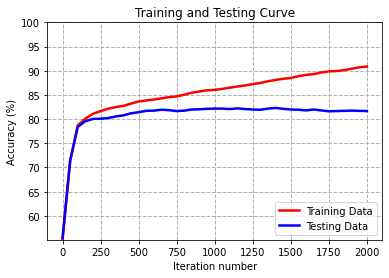

In [21]:
# training and testing accuracy visualization
plt.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training Data')
plt.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing Data')
plt.grid(linestyle='--', linewidth=1)
plt.ylim([min(acc_train_list[0], acc_test_list[0]), 100.0])
plt.legend(loc='lower right')
plt.title('Training and Testing Curve')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy (%)')

Finaly, we will give a general evaluation of the learned baset parameters of the neural netowrks. 

In [22]:
# performance evaluation
y_pred = predict(x_test, best_param_dict).T
# get accuracy score
accuracy_major = accuracy_score(y_test, y_pred)
print('Testing accuracy with neural networks is {} %'.format(accuracy_major*100))

# confusion matrix to describe the performance of a classification model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Testing accuracy with neural networks is 81.66202414113278 %
Confusion Matrix:
[[981 213]
 [182 778]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1194
           1       0.79      0.81      0.80       960

    accuracy                           0.82      2154
   macro avg       0.81      0.82      0.81      2154
weighted avg       0.82      0.82      0.82      2154



## 5. Neural Networks Algorithms with Pytorch <a id='section_5'></a>
To train neural networks in PyTorch, you need to follow several steps, including:
* Generate the dataset structure
* Define the architecture of neural network module
* Define a loss function and select an optimizer
* Define evaluation function
* Iterate through the data to update the network's weights. 

### 5.1. PyTorch Dataset Structure Generation <a id='section_51'></a>

**Dataset**: The `Dataset` class represents a dataset, such as an image dataset or a text dataset. It provides an interface to access and retrieve individual data samples. PyTorch provides a base class called `torch.utils.data.Dataset`, which you can extend to create your custom dataset. In this assignment, we use `torch.utils.data.TensorDataset` to directly construct the dataset by the `NumPy` data from `.csv` file. 

**DataLoader**: The `DataLoader` class provides a convenient way to load data from a dataset. It wraps the dataset and provides options for batching, shuffling, and parallel data loading, among other functionalities. It allows you to efficiently iterate over the dataset during training or testing.

**Task 9:** <a id='task_9'></a> In this task, you will

1. generate dataset from `torch.Tensor` data by `TensorDataset` from `torch.utils.data` (2 lines)
2. generate squential data loader for training and testing by  `DataLoader` from `torch.utils.data` (2 lines)

In [23]:
# numpy to tensor
train_tensor = torch.from_numpy(x_train).to(device)
train_labels = torch.from_numpy(np.squeeze(y_train)).to(device)
test_tensor = torch.from_numpy(x_test).to(device)
test_labels = torch.from_numpy(np.squeeze(y_test)).to(device)

# task 9(A): 
# ====================== START YOUR CODE HERE ======================
# 1. generate dataset from tensor data
train_dataset = TensorDataset(train_tensor, train_labels)
test_dataset = TensorDataset(test_tensor, test_labels)
# ====================== END YOUR CODE HERE ======================

# task 9(B): 
# ====================== START YOUR CODE HERE ======================
# 2. split training and testing datasets
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
# ====================== END YOUR CODE HERE ======================

### 5.2. Define Neural Network Module <a id='section_52'></a>

First, you will define the architecture of the neural neural networks for the classification tasks. As mentioned in [Section 3](#section_3), a hidden layer with `100` nodes and `sigmoid()` activation function and an output layer with two nodes should be included. You should define them with the support of the `PyTorch` library. 

**Task 10:** <a id='task_10'></a>In this task, you will

Task 10(A): Define the layer information：

1. define the hidden layer `self.hidden_layer` with [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), where the parameters include `in_features` (i.e., the variable `input_size`) and `out_features` (`100` as defined)  (1 line)
2. define the output layer `self.output_layer` with [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), where the parameters include `in_features` (the size of the hidden layer). (1 line)
3. define the activation layer `self.activation_layer` with [`torch.nn.Sigmoid()`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html). (1 line)

Task 10(B): Define the data flow in neural networks：

1. send the data inputs `x` into the defined hidden layer `self.hidden_layer` (1 line)
2. send the data inputs `x` into the activation layer `self.activation_layer` (1 line)
3. send the data inputs `x` into the defined output layer `self.output_layer` (1 line)

In [24]:
# Define the neural network model (Linear layer + tanh activation function)
class AutoLoanClassifier(torch.nn.Module):
    def __init__(self, input_size, class_num):
        super(AutoLoanClassifier, self).__init__()
        # task 10(A): 
        # ====================== START YOUR CODE HERE ======================
        # 1. define the layers in neural network includes:
        # * two fully connected layers (torch.nn.Linear): hidden layer and output layer
        # * one activation layer (torch.nn.Sigmoid)
        self.hidden_layer = torch.nn.Linear(input_size, 70)
        self.output_layer = torch.nn.Linear(70, class_num)
        self.activation_layer = torch.nn.Sigmoid()
        # ====================== END YOUR CODE HERE ======================

    def forward(self, x):
        # task 10(B): 
        # ====================== START YOUR CODE HERE ======================
        # 2. let the inputs sequentially pass all the layers according to the configuration of the neural networks.
        x = self.hidden_layer(x)
        x = self.activation_layer(x)
        x = self.output_layer(x)
        # ====================== END YOUR CODE HERE ======================
        return x

[Test Block 7]: Test code for class `AutoLoanClassifier`. 

In [25]:
# extract the first 5 data from the tensors of traning data
demo_data = train_tensor[:5]

# instantialize the neural networks with the size of input features (70)
# transform the model into the selected device 
demo_classifier = AutoLoanClassifier(input_size=train_tensor.shape[-1], class_num=2).to(device)
# initialize weights of neural networks with constants
for module in demo_classifier._modules.values():
    if isinstance(module, torch.nn.Sigmoid):
        continue
    torch.nn.init.constant_(module.weight, 0.7)
    torch.nn.init.constant_(module.bias, 0.1)

# feed data into the demo data
pred_labels = torch.argmax(demo_classifier(demo_data), dim=-1).detach().cpu().numpy()
print('Predicted labels: {}'.format(pred_labels))

if np.allclose(pred_labels, [0, 0, 0, 0, 0]): 
    print('Your answers are correct!')
else:
    print('*** Error! Your answers are not correct. Please correct your code. ***')

Predicted labels: [0 0 0 0 0]
Your answers are correct!


### 5.3. Define Loss Function and Optimizer <a id='section_53'></a>

Before training the neural networks, you should instantiate the network module, define the loss function and define the optimization algorithm for parameter update. 

**Task 11:** <a id='task_11'></a> In this task, you will

Task 11(A): instantiate the neural networks：
1. instantiate the network module with `AutoLoanClassifier()`, the required parameter `input_size=` should be equal to the feature size of the variable `train_tensor`. The parmater `class_num=` should be `2` in this classification task. (1 line)

Task 11(B): define the loss function and the optimizer：
1. define the variable `loss_function` with the cross entropy loss `torch.nn.CrossEntropyLoss()` (1 line)
2. define the variable `optimizer` with [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) optimizer `torch.optim.Adam()`. `lr` denotes the learning rate with `1.0e-4` and the coefficient of L2 regularization `weight_decay` is `3.0e-3`. (1 line)

In [26]:
# task 11(A): 
# ====================== START YOUR CODE HERE ======================
# 1. Instantialize the pre-defined neural network module
auto_loan_classifier = AutoLoanClassifier(input_size=train_tensor.shape[1], class_num=2).to(device)
# ====================== END YOUR CODE HERE ======================

# task 11(B): 
# ====================== START YOUR CODE HERE ======================
# 2. Define the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(auto_loan_classifier.parameters(),lr=1.0e-4, weight_decay=3.0e-3)
# ====================== END YOUR CODE HERE ======================

### 5.4. Train Neural Network <a id='section_54'></a>
We generate data for the inputs and labels from the `DataLoader` in [section 5.1](#section_51). In the training loop, we perform a forward pass, compute the loss, perform a backward pass to calculate the gradients, and then update the weights using the optimizer. We print the loss every 20 epochs to see how well the neural network is performing.

**Task 12:** <a id='task_12'></a> In this task, you will

1. compute the resulting variable `outputs` by a forward pass computation by calling initialized `auto_loan_classifier` object. (1 line)
2. compute the variable `loss` with the loss fucntion `loss_function` (1 line)
3. run backpropagation with the `backward()` method of `loss` variable. (1 line)
4. update the network parameters with `step()` method of the defined optimizer. (1 line)

In [27]:
# records for visualization
acc_train_list = list()
acc_test_list = list()
record_iters = list()

# Train the model with 300 epochs
n_epochs = 300
for epoch in range(n_epochs+1):
    running_loss = 0.
    for feature_batch, label_batch in train_dataloader:
        optimizer.zero_grad()
        # task 12: 
        # ====================== START YOUR CODE HERE ======================
        # forward pass
        outputs = auto_loan_classifier(feature_batch)
        # compute loss 
        loss = loss_function(outputs, label_batch)
        # backward pass
        loss.backward()
        # optimize parameters
        optimizer.step()
        # ====================== END YOUR CODE HERE ======================
        running_loss += loss

    # Print the loss every 20 epochs
    if epoch % 10 == 0:
        with torch.no_grad():
            y_pred_test = torch.argmax(auto_loan_classifier(test_tensor), dim=-1)
            y_pred_train = torch.argmax(auto_loan_classifier(train_tensor), dim=-1)
            acc_test = accuracy_score(y_test, y_pred_test.detach().cpu().numpy())
            acc_train = accuracy_score(y_train, y_pred_train.detach().cpu().numpy())
        
        # training history recording
        acc_train_list.append(acc_train*100)
        acc_test_list.append(acc_test*100)
        record_iters.append(epoch)
        if epoch % 20 == 0:
            print(f"Training Epoch {epoch}, Loss: {running_loss.item():.4f}")
            print('Iteration {}: train Accuracy: {:.2f} %, testing Accurancy: {:.2f} %'.format(epoch, acc_train*100, acc_test*100))

Training Epoch 0, Loss: 54.1867
Iteration 0: train Accuracy: 56.05 %, testing Accurancy: 56.22 %
Training Epoch 20, Loss: 39.6992
Iteration 20: train Accuracy: 76.68 %, testing Accurancy: 76.04 %
Training Epoch 40, Loss: 35.8904
Iteration 40: train Accuracy: 78.21 %, testing Accurancy: 78.23 %
Training Epoch 60, Loss: 34.1259
Iteration 60: train Accuracy: 79.33 %, testing Accurancy: 79.29 %
Training Epoch 80, Loss: 33.1159
Iteration 80: train Accuracy: 79.96 %, testing Accurancy: 80.22 %
Training Epoch 100, Loss: 32.3918
Iteration 100: train Accuracy: 80.58 %, testing Accurancy: 80.73 %
Training Epoch 120, Loss: 32.0338
Iteration 120: train Accuracy: 80.78 %, testing Accurancy: 80.87 %
Training Epoch 140, Loss: 31.7602
Iteration 140: train Accuracy: 80.90 %, testing Accurancy: 80.73 %
Training Epoch 160, Loss: 31.5655
Iteration 160: train Accuracy: 80.86 %, testing Accurancy: 80.83 %
Training Epoch 180, Loss: 31.4012
Iteration 180: train Accuracy: 81.18 %, testing Accurancy: 80.83 %
Tr

Then, we can visualize the accuracy of trainning process in the following code block.

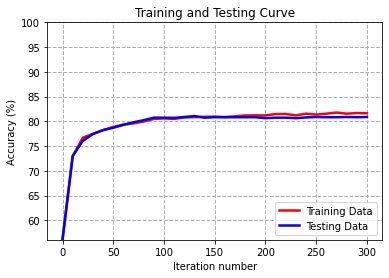

In [28]:
# training and testing accuracy visualization
plt.plot(record_iters, acc_train_list, color='r', linewidth=2.5, label='Training Data')
plt.plot(record_iters, acc_test_list, color='b', linewidth=2.5, label='Testing Data')
plt.grid(linestyle='--', linewidth=1)
plt.ylim([min(acc_train_list[0], acc_test_list[0]), 100.0])
plt.legend(loc='lower right')
plt.title('Training and Testing Curve')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy (%)');

Finaly, you will evaluate the learned parameters of the neural netowrks. Please use the [Netron](https://netron.app/) website app to open the generated `auto_loan_classifier.onnx` model. 

In [29]:
# performance evaluation
y_pred = torch.argmax(auto_loan_classifier(test_tensor), dim=-1)
# get accuracy score
accuracy_score(y_test, y_pred.detach().cpu().numpy())
print('Testing accuracy with neural networks is {} %'.format(accuracy_major*100))

# confusion matrix to describe the performance of a classification model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred.detach().cpu().numpy())) 
print(classification_report(y_test, y_pred.detach().cpu().numpy()))

Testing accuracy with neural networks is 81.66202414113278 %
Confusion Matrix:
[[971 223]
 [189 771]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1194
           1       0.78      0.80      0.79       960

    accuracy                           0.81      2154
   macro avg       0.81      0.81      0.81      2154
weighted avg       0.81      0.81      0.81      2154



### 5.5. Export Network Structures and Visualization <a id='section_55'></a>
Please use the [Netron](https://netron.app/) website app to open the generated `auto_loan_classifier.onnx` model available in the root folder. 

<img src=./auto_loan_classifier.png width=15% />

In above figure, the `Gemm` represents the "General Matrix Multiplication", which includes the multiplication with weights matrix `B`, and the summation with bias vectors `C`.

In [ ]:
# network structure visualization with .onnx file by 'Netron' app
input_names = ["Auto Loan Data"]
output_names = ["Decisions"]
torch.onnx.export(auto_loan_classifier, test_tensor, "auto_loan_classifier.onnx", input_names=input_names, output_names=output_names)

## 6. Prediction of Sample Data <a id='section_6'></a>

In [1]:
# ramdom data item generation from testing dataset
random_idx = np.random.randint(0, x_test.shape[0], size=10)
sample_x_test = x_test[random_idx, :]
sample_y_test = y_test[random_idx, :]

sample_test_tensor = torch.from_numpy(sample_x_test).to(device)
# sampled data visualization
raw_sample_data = pd.DataFrame(scaler.inverse_transform(sample_x_test), columns=feature_name)
raw_sample_data['LoanStatus'] = sample_y_test
raw_sample_data['LoanStatus_Predicted_Numpy'] = predict(sample_x_test, best_param_dict).astype(np.int32).T
raw_sample_data['LoanStatus_Predicted_PyTorch'] = torch.argmax(auto_loan_classifier(sample_test_tensor), dim=-1).detach().cpu().numpy()
raw_sample_data

NameError: name 'np' is not defined